In [1]:
import pandas as pd
import sklearn

In [2]:
df = pd.read_csv("saveTheWorld_en.csv")
df.head(10)

,petal_length,petal_width,leaf_length,leaf_width,class
0,4.6,3.1,1.5,0.2,3
1,5.0,3.6,1.4,0.2,3
2,5.4,3.9,1.7,0.4,3
3,4.6,3.4,1.4,0.3,3
4,5.0,3.4,1.5,0.2,3
5,4.4,2.9,1.4,0.2,3
6,4.9,3.1,1.5,0.1,3
7,5.4,3.7,1.5,0.2,3
8,4.8,3.4,1.6,0.2,3
9,4.8,3.0,1.4,0.1,3


In [4]:
vaccine_data = pd.read_csv("saveTheWorld_en.csv", header=0)

predictors = vaccine_data.drop(['class'],axis=1) # Features
target = vaccine_data['class'] # Target variable

from sklearn.model_selection import train_test_split
predictors_teach, predictors_test, target_teach, target_test = sklearn.model_selection.train_test_split(predictors, target,
                                                                                                        test_size=0.3, random_state=1) 

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
decision_tree = DecisionTreeClassifier(criterion="gini",min_impurity_decrease=0.02,max_depth=4 ,min_samples_leaf=20)

In [7]:
decision_tree = decision_tree.fit(predictors_teach, target_teach)

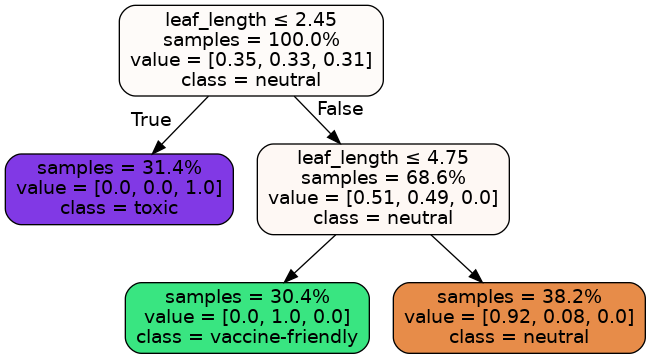

In [8]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


dot_data = StringIO()


export_graphviz(decision_tree, out_file=dot_data,
                filled=True, rounded=True,impurity=False, proportion=True,precision=2,
                special_characters=True, feature_names = predictors.columns,class_names=['neutral','vaccine-friendly','toxic'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

RESULTS:

If the leafs width is <= 0.75 it is poisonous 100%.
If the leafs width is > 0.75 and the length is <= 4.75 it is vaccine-friendly 100%.
If the leafs width is > 0.75 and the length is > it is neutral 92% and 8% are vaccine-friendly.

This decision tree is good for this use, because there are only three categories to determine and two variables to categorize.

In [9]:
prediction = decision_tree.predict(predictors_test)

from sklearn import metrics 

accuracy = metrics.accuracy_score(target_test, prediction)

print("accuracy_score:",accuracy)


accuracy_score: 0.9111111111111111


In [10]:
len(prediction)

45

In [11]:
confusion_matrix = metrics.confusion_matrix(target_test, prediction)

print(confusion_matrix)

[[13  1  0]
 [ 3 13  0]
 [ 0  0 15]]


In [12]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('Truth', size = 18)
    plt.xlabel('Prediction', size = 18)

Confusion matrix, without normalization
[[13  1  0]
 [ 3 13  0]
 [ 0  0 15]]


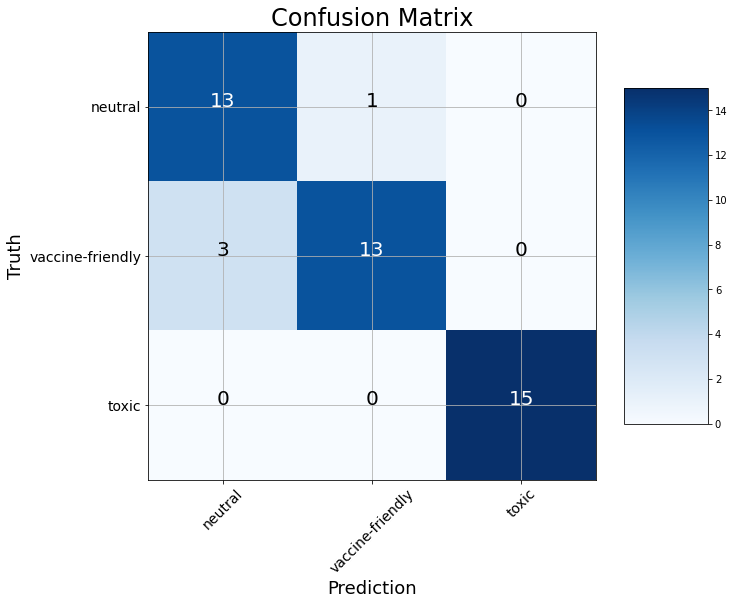

In [13]:
cm = confusion_matrix(target_test, prediction)
plot_confusion_matrix(cm, classes = ['neutral','vaccine-friendly','toxic'],
                      normalize = False,
                      title = 'Confusion Matrix')